<a href="https://colab.research.google.com/github/ArifinRafi/Computer_Graphics423/blob/main/midpoint_LineDrawingAlgo_19301009.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install tensorflow==1.15.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 412.3 MB 27 kB/s 
     |████████████████████████████████| 50 kB 5.1 MB/s 
     |████████████████████████████████| 503 kB 73.4 MB/s 
     |████████████████████████████████| 3.8 MB 52.8 MB/s 
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7554 sha256=09dc988db2d8052466fc66d20b3b028c812ee48017c914cfca190ea3dd431b8f
  Stored in directory: /root/.cache/pip/wheels/21/7f/02/420f32a803f7d0967b48dd823da3f558c5166991bfd204eef3
Successfully built gast
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.9.0
    Uninstalling tensorflow-estimator-2.9.0:
      Successfully uninstalled tensorflow-estimator-2.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.9.1
    Uninstalling tensorboard-2.9.1:
      Successfully uninstalled tensorboard-2.9.1
  Attempting un

In [ ]:
!pip install -q lucid>=0.2.3
!pip install -q moviepy

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
xarray-einstats 0.2.2 requires numpy>=1.21, but you have numpy 1.19.0 which is incompatible.
tensorflow-probability 0.17.0 requires gast>=0.3.2, but you have gast 0.2.2 which is incompatible.
kapre 0.3.7 requires tensorflow>=2.0.0, but you have tensorflow 1.15.0 which is incompatible.
jaxlib 0.3.25+cuda11.cudnn805 requires numpy>=1.20, but you have numpy 1.19.0 which is incompatible.
jax 0.3.25 requires numpy>=1.20, but you have numpy 1.19.0 which is incompatible.
cupy-cuda11x 11.0.0 requires numpy<1.26,>=1.20, but you have numpy 1.19.0 which is incompatible.
cmdstanpy 1.0.8 requires numpy>=1.21, but you have numpy 1.19.0 which is incompatible.


In [ ]:
!pip install imageio==2.4.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 3.3 MB 5.2 MB/s 
  Created wheel for imageio: filename=imageio-2.4.1-py3-none-any.whl size=3303886 sha256=7f3ecb9847c6cf7fb227b81216f4155a8f31d379d3f2622f16bc77222eb41869
  Stored in directory: /root/.cache/pip/wheels/46/20/07/7bb9c8c44e6ec2efa60fd0e6280094f53f65f41767ef69a5ee
Successfully built imageio
  Attempting uninstall: imageio
    Found existing installation: imageio 2.9.0
    Uninstalling imageio-2.9.0:
      Successfully uninstalled imageio-2.9.0


In [ ]:
import numpy as np
import json
import moviepy.editor as mvp
from google.colab import files
import tensorflow.compat.v1.gfile as gfile
import lucid.misc.io.showing as show

In [ ]:
from lucid.misc.gl.glcontext import create_opengl_context
import OpenGL.GL as gl
from OpenGL.GLU import *
WIDTH, HEIGHT = 1200,800
create_opengl_context((WIDTH, HEIGHT))
print(gl.glGetString(gl.GL_VERSION))
print(gl.glGetString(gl.GL_VENDOR)) 


b'4.6.0 NVIDIA 460.32.03'
b'NVIDIA Corporation'


In [ ]:
def zone1(x1, x2, y1, y2):
    n_x1 = y1
    n_x2 = y2
    n_y1 = x1
    n_y2 = x2
    return n_x1, n_x2, n_y1, n_y2

def zone2(x1, x2, y1, y2):
    n_x1 = y1
    n_x2 = y2
    n_y1 = -x1
    n_y2 = -x2
    return n_x1, n_x2, n_y1, n_y2

def zone3(x1, x2, y1, y2):
    new_x1 = -x1
    new_x2 = -x2
    new_y1 = y1
    new_y2 = y2
    return new_x1, new_x2, new_y1, new_y2

def zone4(x1, x2, y1, y2):
    n_x1 = -x1
    n_x2 = -x2
    n_y1 = -y1
    n_y2 = -y2
    return n_x1, n_x2, n_y1, n_y2

def zone5(x1, x2, y1, y2):
    n_x1 = -y1
    n_x2 = -y2
    n_y1 = -x1
    n_y2 = -x2
    return n_x1, n_x2, n_y1, n_y2

def zone6(x1, x2, y1, y2):
    n_x1 = -y1
    n_x2 = -y2
    n_y1 = x1
    n_y2 = x2
    return n_x1, n_x2, n_y1, n_y2

def zone7(x1, x2, y1, y2):
    n_x1 = x1
    n_x2 = x2
    n_y1 = -y1
    n_y2 = -y2
    return n_x1, n_x2, n_y1, n_y2
    

In [ ]:
def check_zone(zone, x1, y1, x2, y2):
  dx = x2 - x1
  dy = y2 - y1
  zone = 0
  if(dx >= 0 and dy >= 0 and dy > dx):
    x1, x2, y1, y2 = zone1(x1, x2, y1, y2)
    zone = 1
  elif(dx < 0 and dy >= 0 and dy > abs(dx)):
    x1, x2, y1, y2 = zone2(x1, x2, y1, y2)
    zone = 2
  elif(dx < 0 and dy >= 0 and dy < abs(dx)):
    x1, x2, y1, y2 = zone3(x1, x2, y1, y2)
    zone = 3
  elif(dx < 0 and dy < 0 and abs(dy) < abs(dx)):
    x1, x2, y1, y2 = zone4(x1, x2, y1, y2)
    zone = 4
  elif(dx < 0 and dy < 0 and abs(dy) > abs(dx)):
    x1, x2, y1, y2 = zone5(x1, x2, y1, y2)
    zone = 5
  elif(dx >= 0 and dy < 0 and abs(dy) > dx):
    x1, x2, y1, y2 = zone6(x1, x2, y1, y2)
    zone = 6
  elif(dx >= 0 and dy < 0 and abs(dy) < dx):
    x1, x2, y1, y2 = zone7(x1, x2, y1, y2)
    zone = 7

  return zone, x1, y1, x2, y2

In [ ]:
def original_zone(zone, x, y):
  n_x, n_y = x, y
  if(zone == 1):
    n_x = y
    n_y = x
  elif(zone == 2):
    n_x = -y
    n_y = x
  elif(zone == 3):
    n_x = -x
    n_y = y
  elif(zone == 4):
    n_x = -x
    n_y = -y
  elif(zone == 5):
    n_x = -y
    n_y = -x
  elif(zone == 6):
    n_x = y
    n_y = -x
  elif(zone == 7):
    n_x = x
    n_y = -y
  return n_x, n_y

In [ ]:
def MidPoint(zone, x1, y1, x2, y2):
  dy = y2 - y1
  dx = x2 - x1
  D = 2*dy - dx
  while(x1 <= x2 and y1 <= y2):
    orig_x, orig_y = original_zone(zone, x1, y1)
    AddPoints(orig_x/100, orig_y/100)
    if(D >= 0):
      x1 = x1 + 1
      y1 = y1 +1
      D = D + 2*dy - 2*dx
    elif(D < 0):
      x1 = x1 + 1
      D = D + 2*dy
  

In [ ]:
def draw(a, b, c, d):
  zone_num = 0
  zone_num, a, b, c, d = check_zone(zone_num, a, b, c, d)
  MidPoint(zone_num, a, b, c, d)


In [ ]:
def drawing_dig(dig, direction):
  x1, y1, x2, y2 = 10, 80, 60, -80
  x_half = (x1+x2)/2
  y_half = (y1+y2)/2
  if(dig == '0'):
    if(direction == 1):
      draw(x1, y1, x2, y1)
      draw(x1, y1, x1, y2)
      draw(x2, y1, x2, y2)
      draw(x1, y2, x2, y2)
    else:
      draw(-x1, y1, -x2, y1)
      draw(-x1, y1, -x1, y2)
      draw(-x2, y1, -x2, y2)
      draw(-x1, y2, -x2, y2)
  elif(dig == '1'):
    if(direction == 1):
      draw(x1, y2, x2, y2)
      draw((x1+x2)/2, y1, (x1+x2)/2, y2)
      draw(x1, (y1+y2)/2, (x1+x2)/2, y1)
    else:
      draw(-x1, y2, -x2, y2)
      draw(-(x1+x2)/2, y1, -(x1+x2)/2, y2)
      draw(-x2, (y1+y2)/2, -(x1+x2)/2, y1)
  elif(dig == '2'):
    if(direction == 1):
      draw(x1, y1, x2, y1)
      draw(x2, y1, x2, (y1+y2)/2)
      draw(x2, (y1+y2)/2, x1, (y1+y2)/2)
      draw(x1, (y1+y2)/2, x1, y2)
      draw(x1, y2, x2, y2)
    else:
      draw(-x2, y1, -x1, y1)
      draw(-x1, y1, -x1, (y1+y2)/2)
      draw(-x1, (y1+y2)/2, -x2, (y1+y2)/2)
      draw(-x2, (y1+y2)/2, -x2, y2)
      draw(-x2, y2, -x1, y2)
  elif(dig == '3'):
    if(direction == 1):
      draw(x1, y1, x2, y1)
      draw(x2, y1, x2, y_half)
      draw(x2, y_half, x1, y_half)
      draw(x2, y_half, x2, y2)
      draw(x2, y2, x1, y2)
    else:
      draw(-x2, y1, -x1, y1)
      draw(-x1, y1, -x1, y_half)
      draw(-x1, y_half, -x2, y_half)
      draw(-x1, y_half, -x1, y2)
      draw(-x1, y2, -x2, y2)
  elif(dig == '4'):
    if(direction == 1):
      draw(x2, y1, x2, y2)
      draw(x1, y_half, x2, y_half)
      draw(x1, y_half, x1, y1)
    else:
      draw(-x1, y1, -x1, y2)
      draw(-x2, y_half, -x1, y_half)
      draw(-x2, y_half, -x2, y1)
  elif(dig == '5'):
    if(direction == 1):
      draw(x1, y1, x2, y1)
      draw(x1, y1, x1, y_half)
      draw(x2, (y1+y2)/2, x1, (y1+y2)/2)
      draw(x2, y_half, x2, y2)
      draw(x1, y2, x2, y2)
    else:
      draw(-x2, y1, -x1, y1)
      draw(-x2, y1, -x2, (y1+y2)/2)
      draw(-x1, (y1+y2)/2, -x2, (y1+y2)/2)
      draw(-x1, (y1+y2)/2, -x1, y2)
      draw(-x2, y2, -x1, y2)
  elif(dig == '6'):
    if(direction == 1):
      draw(x1, y1, x2, y1)
      draw(x1, y1, x1, y_half)
      draw(x2, (y1+y2)/2, x1, (y1+y2)/2)
      draw(x2, y_half, x2, y2)
      draw(x1, y2, x2, y2)
      draw(x1, (y1+y2)/2, x1, y2)
    else:
      draw(-x2, y1, -x1, y1)
      draw(-x2, y1, -x2, (y1+y2)/2)
      draw(-x1, (y1+y2)/2, -x2, (y1+y2)/2)
      draw(-x1, (y1+y2)/2, -x1, y2)
      draw(-x2, y2, -x1, y2)
      draw(-x2, (y1+y2)/2, -x2, y2)
  elif(dig == '7'):
    if(direction == 1):
      draw(x1, y1, x2, y1)
      draw(x2, y1, x2, y2)
    else:
      draw(-x2, y1, -x1, y1)
      draw(-x1, y1, -x1, y2)
  elif(dig == '8'):
    if(direction == 1):
      draw(x1, y1, x2, y1)
      draw(x2, y1, x2, (y1+y2)/2)
      draw(x1, y1, x1, y_half)
      draw(x2, (y1+y2)/2, x1, (y1+y2)/2)
      draw(x2, y_half, x2, y2)
      draw(x1, (y1+y2)/2, x1, y2)
      draw(x1, y2, x2, y2)
    else:
      draw(-x2, y1, -x1, y1)
      draw(-x1, y1, -x1, (y1+y2)/2)
      draw(-x2, y1, -x2, (y1+y2)/2)
      draw(-x1, (y1+y2)/2, -x2, (y1+y2)/2)
      draw(-x1, (y1+y2)/2, -x1, y2)
      draw(-x2, (y1+y2)/2, -x2, y2)
      draw(-x2, y2, -x1, y2)
  elif(dig == '9'):
    if(direction == 1):
      draw(x1, y1, x2, y1)
      draw(x2, y1, x2, (y1+y2)/2)
      draw(x1, y1, x1, y_half)
      draw(x2, (y1+y2)/2, x1, (y1+y2)/2)
      draw(x2, y_half, x2, y2)
      draw(x1, y2, x2, y2)
    else:
      draw(-x2, y1, -x1, y1)
      draw(-x1, y1, -x1, (y1+y2)/2)
      draw(-x2, y1, -x2, (y1+y2)/2)
      draw(-x1, (y1+y2)/2, -x2, (y1+y2)/2)
      draw(-x1, (y1+y2)/2, -x1, y2)
      draw(-x2, y2, -x1, y2)


In [ ]:
gl.glClear(gl.GL_COLOR_BUFFER_BIT)
gl.glColor3f(.7, 2,3)
gl.glPointSize(5)
def AddPoints(x, y):
  gl.glBegin(gl.GL_POINTS)
  gl.glVertex2f(x, y)
  gl.glEnd()

In [ ]:
ID = input("Enter Any ID : ")
last_dig = ID[-1]
sec_last_dig = ID[-2]
drawing_dig(last_dig, 1)
drawing_dig(sec_last_dig, 0)

Enter Any ID : 09



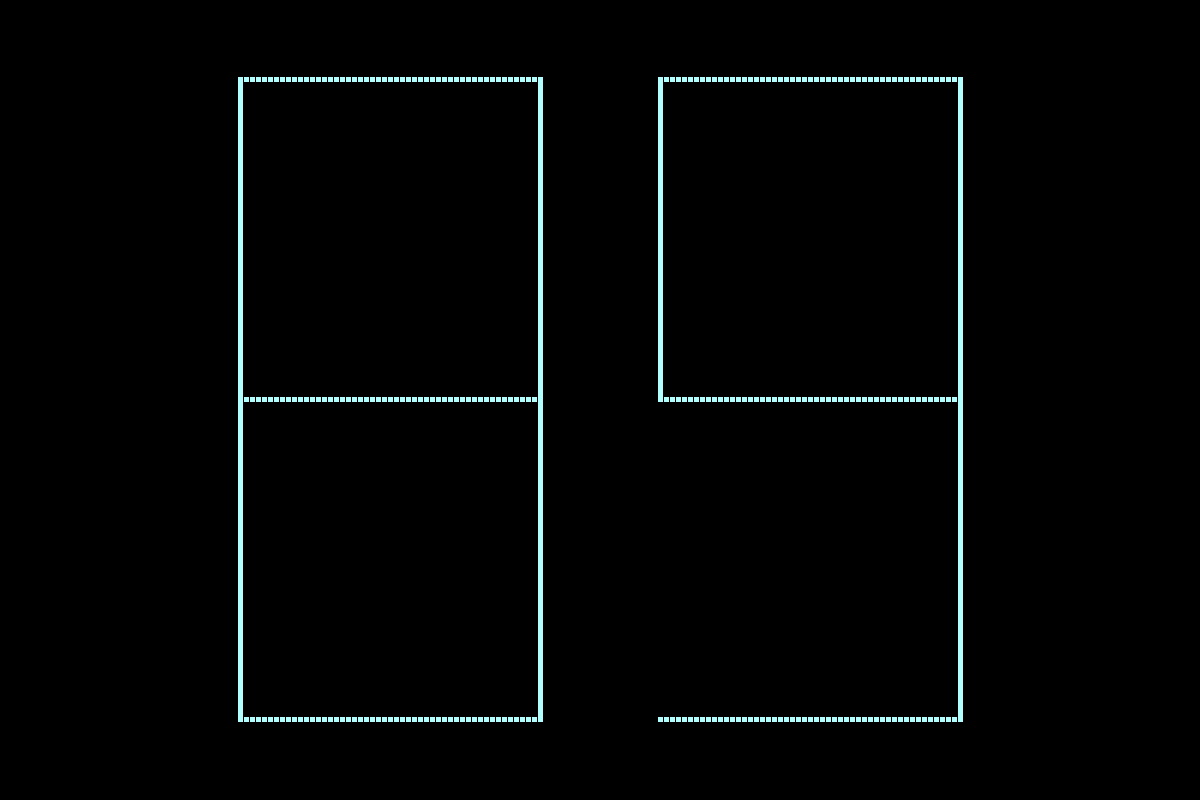

In [ ]:
img_buf = gl.glReadPixelsub(0, 0, WIDTH, HEIGHT, gl.GL_RGB, gl.GL_UNSIGNED_BYTE)
img = np.frombuffer(img_buf, np.uint8).reshape(HEIGHT, WIDTH, 3)[::-1]
show.image(img/255.0)